In [1]:
import pandas as pd
import numpy as np

In [2]:
dt= pd.read_csv('train.csv')

In [3]:
dt.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
dt.shape

(7613, 5)

In [5]:
dt.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

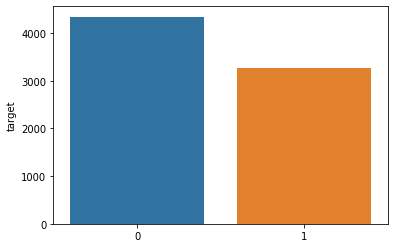

In [7]:
sns.barplot(dt['target'].value_counts().index,dt['target'].value_counts())

In [8]:
dt['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [9]:
dt['length'] = dt['text'].apply(len)

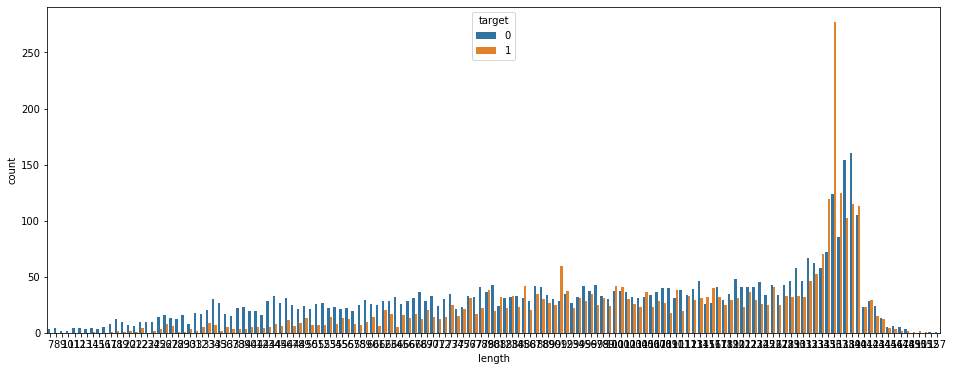

In [10]:
plt.figure(figsize=(16,6))
sns.countplot(x= dt['length'], hue= dt['target'])

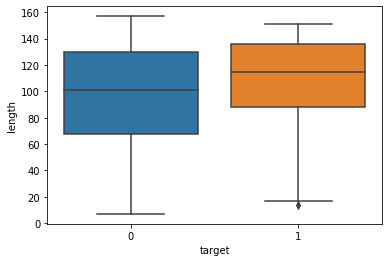

In [11]:
sns.boxplot(y= dt['length'], x= dt['target'])

In [12]:
len(dt.keyword.unique()) #it also include NaN 

222

In [13]:
dt.keyword.nunique()

221

In [14]:
dt.keyword.value_counts()[:20]

fatalities     45
deluge         42
armageddon     42
body%20bags    41
damage         41
sinking        41
harm           41
windstorm      40
evacuate       40
twister        40
fear           40
collided       40
outbreak       40
siren          40
wreckage       39
wrecked        39
whirlwind      39
weapon         39
weapons        39
sinkhole       39
Name: keyword, dtype: int64

In [15]:
import nltk    
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer 
import re
import string

[nltk_data] Downloading package stopwords to C:\Users\Ujjval
[nltk_data]     Priyadarshi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
stopwords= stopwords.words('english')

Now removing stopwords, pass to lower add delimiter and more

In [17]:
ps= PorterStemmer()

In [18]:
def clean_text(text):
 
    text = re.sub('[^a-zA-Z]', ' ', text)  

    text = text.lower()  

    text = text.split()  
    
    text = [w for w in text if not w in set(stopwords)] 

    text = ' '.join(text)    
            
    return text


In [19]:
# Apply clean text 
dt['text'] = dt['text'].apply(lambda x : clean_text(x))

In [20]:
dt['text'][0]

'deeds reason earthquake may allah forgive us'

In [21]:
corpus= []

for i in range(0, len(dt)):
    text= dt['text'][i]
    text= text.split()
    text= [ps.stem(word) for word in text]
    text= ' '.join(text)
    corpus.append(text)  

In [22]:
#Create dictionary 
uniqueWords = {}
for text in corpus:
    for word in text.split():
        if(word in uniqueWords.keys()):
            uniqueWords[word] += 1
        else:
            uniqueWords[word] = 1
            
#Convert dictionary to dataFrame
uniqueWords = pd.DataFrame.from_dict(uniqueWords,orient='index',columns=['WordFrequency'])
uniqueWords.sort_values(by=['WordFrequency'], inplace=True, ascending=False)
print("Number of records in Unique Words Data frame are {}".format(len(uniqueWords)))
uniqueWords.head(10)

Number of records in Unique Words Data frame are 18889


,WordFrequency
co,4746
http,4721
like,411
fire,363
amp,344
get,311
bomb,239
new,228
via,220
u,216


In [23]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = len(uniqueWords))
#Create Bag of Words Model , here X represent bag of words
X = cv.fit_transform(corpus).todense()
y = dt['target'].values

In [24]:
X

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 2020)

In [26]:
from sklearn.naive_bayes import GaussianNB

classifierGNB = GaussianNB()
classifierGNB.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [27]:
predGB= classifierGNB.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score

cn_GNB= confusion_matrix(predGB, y_test)

In [29]:
cn_GNB

array([[383, 133],
       [466, 541]], dtype=int64)

In [30]:
acc= accuracy_score(predGB, y_test)

In [31]:
acc

0.6066973079448457

In [32]:
from sklearn.tree import DecisionTreeClassifier

classifier_dtree = DecisionTreeClassifier(criterion = 'entropy')

In [33]:
classifier_dtree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
pred_dtree= classifier_dtree.predict(x_test)

In [35]:
cn_dtree= confusion_matrix(pred_dtree , y_test)

In [36]:
acc_dtree= accuracy_score(pred_dtree , y_test)

In [37]:
cn_dtree, acc_dtree

(array([[688, 194],
        [161, 480]], dtype=int64), 0.7669074195666448)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

In [39]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [40]:
knn_pred= knn.predict(x_test)

In [41]:
acc_knn= accuracy_score(knn_pred, y_test)

In [42]:
acc_knn

0.711096520026264

In [43]:
knn_cfm= confusion_matrix(knn_pred, y_test)

In [44]:
knn_cfm

array([[805, 396],
       [ 44, 278]], dtype=int64)

In [45]:
from sklearn.linear_model import LogisticRegression

classifier_LR= LogisticRegression()

In [46]:
classifier_LR.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
pred_LR= classifier_LR.predict(x_test)

In [48]:
acc_lr= accuracy_score(pred_LR, y_test)
acc_lr

0.8076165462902167

In [49]:
cfm_lr= confusion_matrix(pred_LR, y_test)

In [50]:
cfm_lr

array([[753, 197],
       [ 96, 477]], dtype=int64)

In [51]:
from sklearn.naive_bayes import MultinomialNB

classifier_mnb  = MultinomialNB()
classifier_mnb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [52]:
pred_mnb= classifier_mnb.predict(x_test) 

In [53]:
acc_mnb= accuracy_score(pred_mnb, y_test)
acc_mnb

0.8023637557452397

In [54]:
cfm_mnb= confusion_matrix(pred_mnb, y_test)
cfm_mnb

array([[719, 171],
       [130, 503]], dtype=int64)

In [55]:
from sklearn.svm import SVC

classifier_svm= SVC()

In [56]:
classifier_svm.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [57]:
pred_svm= classifier_svm.predict(x_test)

In [58]:
acc_svm= accuracy_score(pred_svm, y_test)

In [59]:
acc_svm

0.8135259356533159

In [60]:
cnf_svm= confusion_matrix(pred_svm, y_test)
cnf_svm

array([[789, 224],
       [ 60, 450]], dtype=int64)

In [61]:
from sklearn.ensemble import VotingClassifier

In [62]:
models= [('LogisticRegression',classifier_LR), 
         ('DecisionTree Classifier',classifier_dtree), 
         ('K-Nerarest Neighbour', knn), ('Support Vector Machine', classifier_svm),
         ('Gaussian Naive Bayes',classifierGNB),
         ('MultinomialNB',classifier_mnb) ]

In [63]:
classifier_vc= VotingClassifier(voting = 'hard',estimators= models)

In [64]:
classifier_vc.fit(x_train, y_train)

VotingClassifier(estimators=[('LogisticRegression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('DecisionTree Classifier',
                              DecisionTreeClassifier(ccp_alpha=0.0...
                                  decision_function_shape='ovr', degree=3,
                                  gamma='scale', kernel='rbf', max_iter=

In [65]:
predvc= classifier_vc.predict(x_test)

In [66]:
acc_vc= accuracy_score(predvc, y_test)

In [67]:
acc_vc

0.8128693368351937

In [68]:
conf_vc= confusion_matrix(predvc, y_test)
conf_vc

array([[789, 225],
       [ 60, 449]], dtype=int64)

In [72]:
dt['text']

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       people receive wildfires evacuation orders cal...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    aria ahrary thetawniest control wild fires cal...
7610             utc km volcano hawaii http co zdtoyd ebj
7611    police investigating e bike collided car littl...
7612    latest homes razed northern california wildfir...
Name: text, Length: 7613, dtype: object